In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [15]:
dataset=pd.read_csv('C:/Users/nidhi/Downloads/diabetes.csv')

In [16]:
dataset.shape

(768, 9)

In [17]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

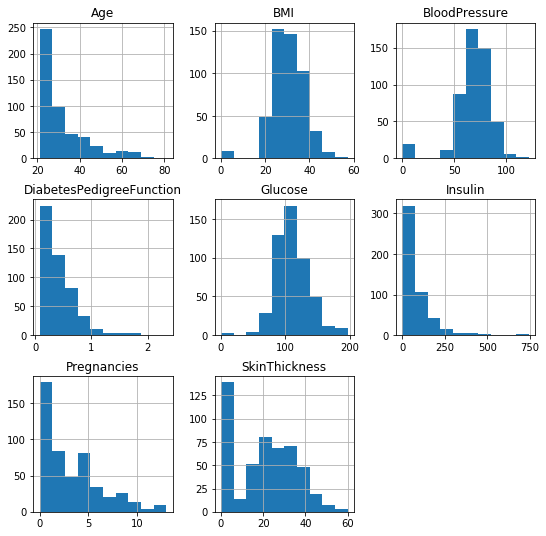

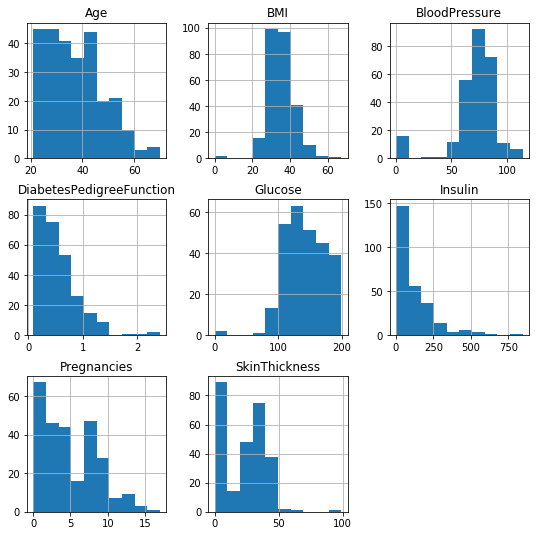

In [19]:
dataset.groupby('Outcome').hist(figsize=(9,9))

In [20]:
#Populate data X(ind var) and Y(dep var)
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,8].values

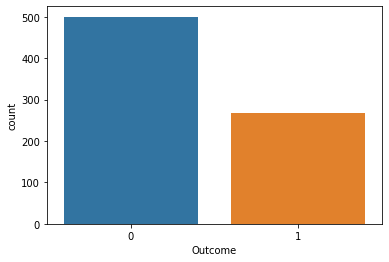

In [21]:
sb.countplot(dataset['Outcome'],label="Count")

In [22]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


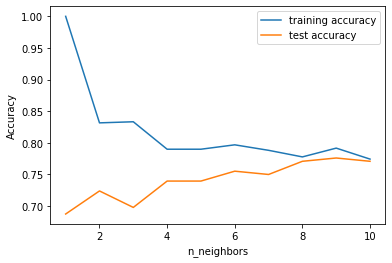

In [23]:
#stratify-divides the values into two equal parts
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.loc[:,dataset.columns!='Outcome'],
                                              dataset['Outcome'],stratify=dataset['Outcome'],
                                              random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
#try n_neighbours from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    #record the training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(x_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [24]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(knn.score(x_train,y_train)))
print('Accuracy of K-NN classifier on test set:{:.2f}'.format(knn.score(x_test,y_test)))

Accuracy of K-NN classifier on training set:0.79
Accuracy of K-NN classifier on test set:0.78


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual=y_test
predicted=knn.predict(x_test)
results=confusion_matrix(actual,predicted)
print('confusion matrix:')
print(results)
print('accuracy score:',accuracy_score(actual,predicted))
print('report:')
print(classification_report(actual,predicted))

confusion matrix:
[[105  20]
 [ 23  44]]
accuracy score: 0.7760416666666666
report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       125
           1       0.69      0.66      0.67        67

    accuracy                           0.78       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.77      0.78      0.77       192



In [26]:
knn.predict(x_test)[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [27]:
knn.predict_proba(x_test)[0:5]

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [29]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic(ROC) Curve')
    plt.legend()
    plt.show()

In [31]:
probs=knn.predict_proba(x_test)
probs

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.55555556, 0.44444444],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.88888889, 0.11111111],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [0.77777778, 0.22222222],
       [0.11111111, 0.88888889],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.44444444, 0.55555556],
       [0.77777778, 0.22222222],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.77777778, 0.22222222],
       [0.44444444, 0.55555556],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [0.

In [32]:
probs=probs[:,1]
probs

array([0.66666667, 0.33333333, 0.11111111, 0.        , 0.        ,
       0.66666667, 0.66666667, 0.44444444, 0.        , 0.33333333,
       1.        , 0.11111111, 0.77777778, 0.        , 0.44444444,
       0.11111111, 0.22222222, 0.88888889, 0.66666667, 0.66666667,
       0.55555556, 0.22222222, 0.44444444, 0.44444444, 0.44444444,
       0.22222222, 0.55555556, 0.44444444, 0.11111111, 0.11111111,
       0.22222222, 0.33333333, 0.44444444, 0.11111111, 0.44444444,
       0.44444444, 0.44444444, 0.55555556, 0.77777778, 0.22222222,
       0.77777778, 0.        , 0.22222222, 0.11111111, 0.88888889,
       0.        , 0.        , 0.66666667, 0.22222222, 0.66666667,
       0.44444444, 1.        , 0.        , 0.33333333, 0.88888889,
       0.44444444, 0.55555556, 0.44444444, 0.        , 0.77777778,
       0.33333333, 0.44444444, 0.11111111, 0.22222222, 0.77777778,
       0.        , 0.22222222, 0.44444444, 0.33333333, 0.33333333,
       0.11111111, 0.22222222, 0.22222222, 0.        , 0.33333

In [33]:
auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'%auc)

AUC:0.82


In [34]:
fpr,tpr,thresholds=roc_curve(y_test,probs)

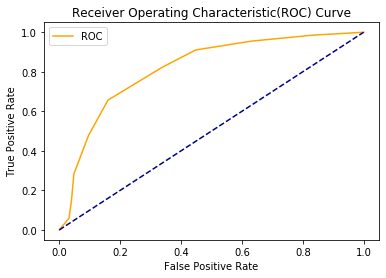

In [35]:
plot_roc_curve(fpr,tpr)